In [1]:
import json
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit.Chem import MCS
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdFMCS
from rdkit import rdBase

from rdkit.Chem import rdMolDescriptors

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  after removing the cwd from sys.path.


In [2]:
with open('nib_172.json', 'r') as f:

    json_data = json.load(f)

#print(json.dumps(json_data) )

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
print(json.dumps(json_data, indent="\t") )

{
	"version": 24.3,
	"renderTo": "canvas",
	"data": {
		"x": [],
		"y": {
			"vars": [
				"S_-TIPIFARNIB",
				"11C_-SORAFENIB",
				"5-_11C_methoxy-sunitinib",
				"5-iodo-sunitinib",
				"5-methoxy-sunitinib",
				"ABC-294640",
				"ABIVERTINIB",
				"ABROCITINIB",
				"ACALABRUTINIB",
				"AFATINIB",
				"AGERAFENIB",
				"ALECTINIB",
				"ALFLUTINIB",
				"ALLITINIB",
				"ALTIRATINIB",
				"AMUVATINIB",
				"ANLOTINIB",
				"ASCIMINIB",
				"AVAPRITINIB",
				"AXITINIB",
				"BAFETINIB",
				"BARICITINIB",
				"BELORANIB",
				"BEMCENTINIB",
				"BINIMETINIB",
				"BOSUTINIB",
				"BRANEBRUTINIB",
				"BREPOCITINIB",
				"BRIGATINIB",
				"BRIVANIB",
				"CABOZANTINIB",
				"CANERTINIB",
				"CAPMATINIB",
				"CEDIRANIB",
				"CERDULATINIB",
				"CERITINIB",
				"CHIAURANIB",
				"COBIMETINIB",
				"CRENOLANIB",
				"CRIZOTINIB",
				"DABRAFENIB",
				"DACOMITINIB",
				"DASATINIB",
				"DECERNOTINIB",
				"DEFACTINIB",
				"DELGOCITINIB",
				"Demethyl-imatinib",
				"DENIBULIN"

In [4]:
name=json_data['data']['y']["vars"]

In [5]:
value=json_data['data']['y']["data"]

In [6]:
data=pd.DataFrame(name)

In [7]:
x=[]
y=[]
for i in value:
    x.append(i[0])
    y.append(i[1])



In [8]:
data['x']=x
data['y']=y

In [9]:
data.rename(columns={0:"name"}, inplace=True)

In [10]:
data

,name,x,y
0,S_-TIPIFARNIB,-0.194565,-0.054636
1,11C_-SORAFENIB,-0.309891,-0.144591
2,5-_11C_methoxy-sunitinib,0.137404,-0.235080
3,5-iodo-sunitinib,0.150344,-0.250651
4,5-methoxy-sunitinib,0.137404,-0.235080
...,...,...,...
167,VATALANIB,-0.176218,-0.001369
168,VECABRUTINIB,0.197757,0.010397
169,VEMURAFENIB,-0.122549,-0.106374
170,VOROLANIB,0.121487,-0.216752


C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='x', ylabel='y'>

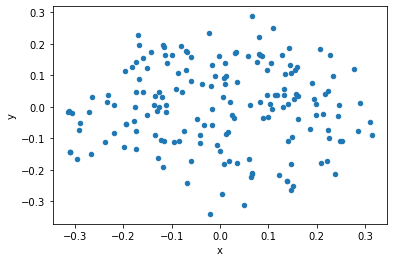

In [11]:
data.plot.scatter(x='x',y='y')

In [12]:
value[0]

[-0.194565039350966, -0.0546363458646758]

In [13]:
len(y)

172

In [14]:
vec=[]

In [15]:
data1=data

In [16]:
data1.drop('name',axis=1,inplace=True)
data2=data1

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans=KMeans(n_clusters=5).fit(data1)

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
kmeans.cluster_centers_

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.01785611, -0.16353798],
       [-0.11430702,  0.10467356],
       [ 0.07890734,  0.12651082],
       [ 0.19898845, -0.02878034],
       [-0.22501898, -0.06793801]])

In [20]:
data1['cluster']=kmeans.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

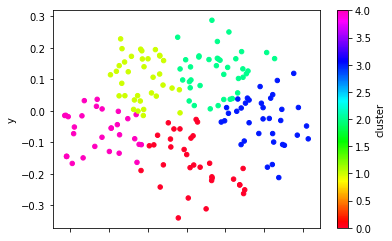

In [21]:
data1.plot.scatter('x', 'y', c='cluster', colormap='gist_rainbow')

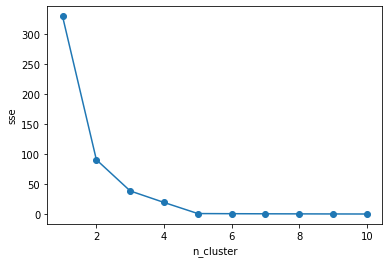

In [22]:
def elbow(x):
    sse=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i, init='k-means++',random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('n_cluster')
    plt.ylabel('sse')
    plt.show()
             
elbow(data2)

In [23]:
data1

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,x,y,cluster
0,-0.194565,-0.054636,4
1,-0.309891,-0.144591,4
2,0.137404,-0.235080,0
3,0.150344,-0.250651,0
4,0.137404,-0.235080,0
...,...,...,...
167,-0.176218,-0.001369,4
168,0.197757,0.010397,3
169,-0.122549,-0.106374,4
170,0.121487,-0.216752,0


In [24]:
data1['name']=name

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
data1

,x,y,cluster,name
0,-0.194565,-0.054636,4,S_-TIPIFARNIB
1,-0.309891,-0.144591,4,11C_-SORAFENIB
2,0.137404,-0.235080,0,5-_11C_methoxy-sunitinib
3,0.150344,-0.250651,0,5-iodo-sunitinib
4,0.137404,-0.235080,0,5-methoxy-sunitinib
...,...,...,...,...
167,-0.176218,-0.001369,4,VATALANIB
168,0.197757,0.010397,3,VECABRUTINIB
169,-0.122549,-0.106374,4,VEMURAFENIB
170,0.121487,-0.216752,0,VOROLANIB


In [26]:
type(data1)

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pandas.core.frame.DataFrame

In [27]:
#data1.to_excel('nib_172_kmeans.xlsx',index=False)